In [31]:
import pandas as pd

In [32]:
df = pd.read_excel('data/Книга1.xls')

In [33]:
df.head()

,Пол,Цистит/пиелонефрит,Дренажи,МКБ,Осложн/ не осложн,Микроорганизм,Группа,ООИ
0,1,2,0,0,0,8,EC,1
1,1,2,0,0,0,8,EC,0
2,1,2,0,0,0,8,EC,1
3,1,0,1,1,0,8,EC,1
4,2,2,0,0,0,8,EC,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Пол                 568 non-null    int64 
 1   Цистит/пиелонефрит  568 non-null    int64 
 2   Дренажи             568 non-null    int64 
 3   МКБ                 568 non-null    int64 
 4   Осложн/ не осложн   568 non-null    int64 
 5   Микроорганизм       568 non-null    int64 
 6   Группа              568 non-null    object
 7   ООИ                 568 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 35.6+ KB


In [35]:
df['Группа'].value_counts()

Группа
EC    336
KP    105
GP    101
NF     26
Name: count, dtype: int64

In [36]:
#EC = 1
#KP = 2
#GP = 3
#NF = 4

In [37]:
df['Группа'] = df['Группа'].apply(lambda x: 1 if x == 'EC' else x)

In [38]:
df['Группа'] = df['Группа'].apply(lambda x: 3 if x == 'GP' else x)
df['Группа'] = df['Группа'].apply(lambda x: 2 if x == 'KP' else x)
df['Группа'] = df['Группа'].apply(lambda x: 4 if x == 'NF' else x)


In [39]:
df['Группа'] = df['Группа'].astype(int)

In [40]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

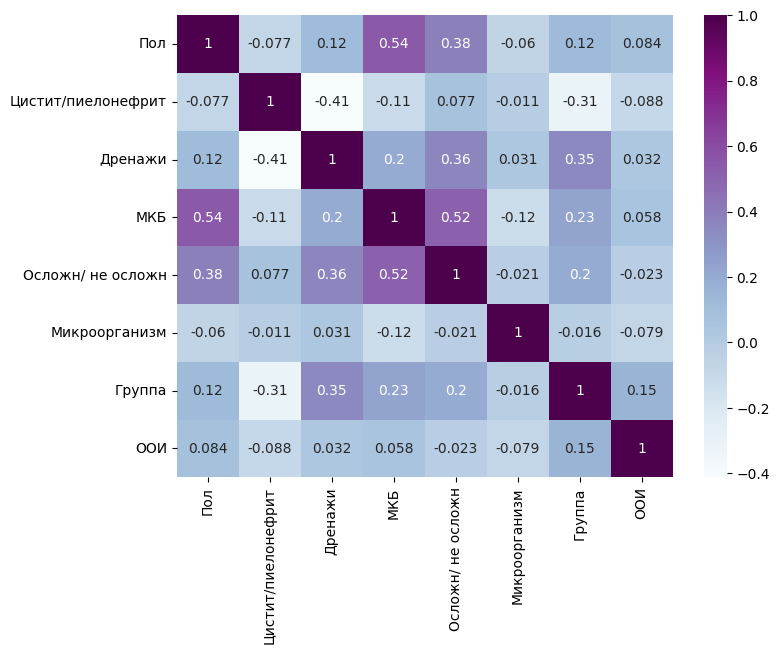

In [41]:
correlation=df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='BuPu')
plt.show()

In [42]:
df['Микроорганизм'] = df['Микроорганизм'].apply(lambda x: 6 if x == 16 or x == 14 or x == 13 or x == 7 else x)
df['Микроорганизм'] = df['Микроорганизм'].apply(lambda x: 10 if x == 9 or x == 11 or x == 4 or x ==3 else x)
df['Микроорганизм'] = df['Микроорганизм'].apply(lambda x: 1 if x == 2 or x == 12 else x)


In [43]:
df['Группа'].value_counts()

Группа
1    336
2    105
3    101
4     26
Name: count, dtype: int64

In [44]:
y1 = df['Микроорганизм']
y2 = df['Группа']

In [45]:
X = df.drop(columns=['Микроорганизм', 'Группа'])

In [46]:
#Предсказание микроорганизма

In [47]:
from sklearn.model_selection import train_test_split
TRAIN_SIZE = 0.8
X_train, X_val, y_train, y_val = train_test_split(X, y2, train_size=TRAIN_SIZE)

In [89]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [90]:
y_val.value_counts()

Группа
1    60
2    28
3    23
4     3
Name: count, dtype: int64

In [91]:
y_pred = model1.predict(X_val)

In [92]:
(y_pred == y_val.values).mean()  # accuracy


0.5701754385964912

In [93]:
y2.value_counts()

Группа
1    336
2    105
3    101
4     26
Name: count, dtype: int64

In [53]:
import numpy as np

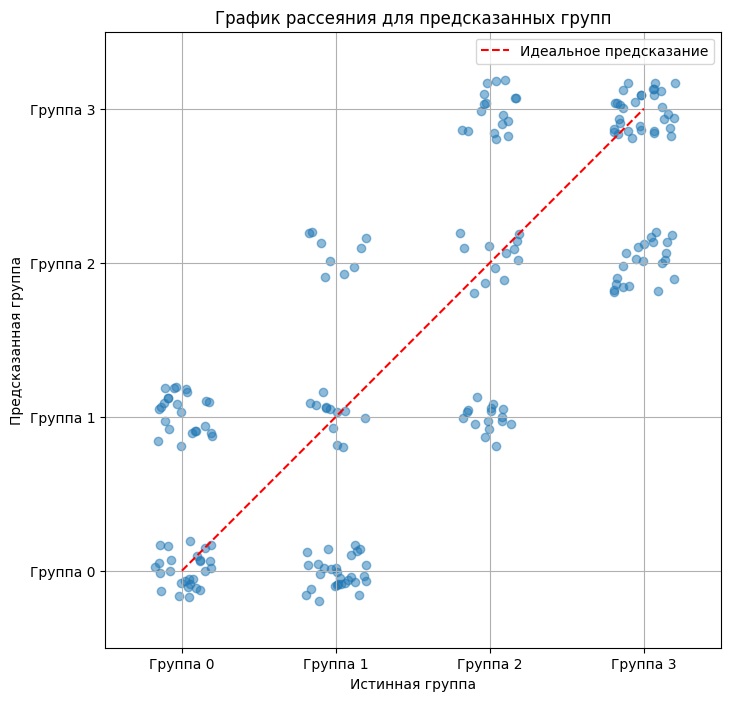

In [64]:
# Преобразуем списки в массивы NumPy для удобства
import random

# 1. Сгенерируем примеры данных для категориального признака
num_samples = 200 # Увеличим количество точек
num_categories = 4 # Примерное количество категорий

# Истинные категории (целые числа от 0 до num_categories - 1)
true_categories = [random.randint(0, num_categories - 1) for _ in range(num_samples)]
# Предсказанные категории (добавим немного "шума" для реалистичности)
predicted_categories = [max(0, min(num_categories - 1, cat + random.randint(-1, 1))) for cat in true_categories]

predictions = np.array(y_pred)
true_values = np.array(y_val.values)


# 2. Добавим "jitter" (небольшое случайное смещение) для точек, чтобы их было лучше видно
jitter = 0.2 # Величина смещения
jitter_x = np.random.uniform(-jitter, jitter, size=len(true_categories))
jitter_y = np.random.uniform(-jitter, jitter, size=len(predicted_categories))

x_coords = true_categories + jitter_x
y_coords = predicted_categories + jitter_y


# 3. Создаем график рассеяния
plt.figure(figsize=(8, 8))

plt.scatter(x_coords, y_coords, alpha=0.5, marker='o') # Используем jitter координаты

# Опционально: Линия "идеального" предсказания для категорий (диагональ)
category_values = range(num_categories)
plt.plot(category_values, category_values, 'r--', label='Идеальное предсказание')


# 4. Настройка графика
plt.xlabel('Истинная группа')
plt.ylabel('Предсказанная группа')
plt.title('График рассеяния для предсказанных групп')
plt.xticks(category_values, [f'Группа {i}' for i in category_values]) # Подписи для категорий по оси X
plt.yticks(category_values, [f'Группа {i}' for i in category_values]) # Подписи для категорий по оси Y
plt.xlim(-0.5, num_categories - 0.5) # Расширим оси, чтобы вместить jitter
plt.ylim(-0.5, num_categories - 0.5)
plt.gca().set_aspect('equal', adjustable='box') # Одинаковый масштаб осей
plt.grid(True)
plt.legend()
plt.show()
  

In [95]:
y_prob = model1.predict_proba(X_val)

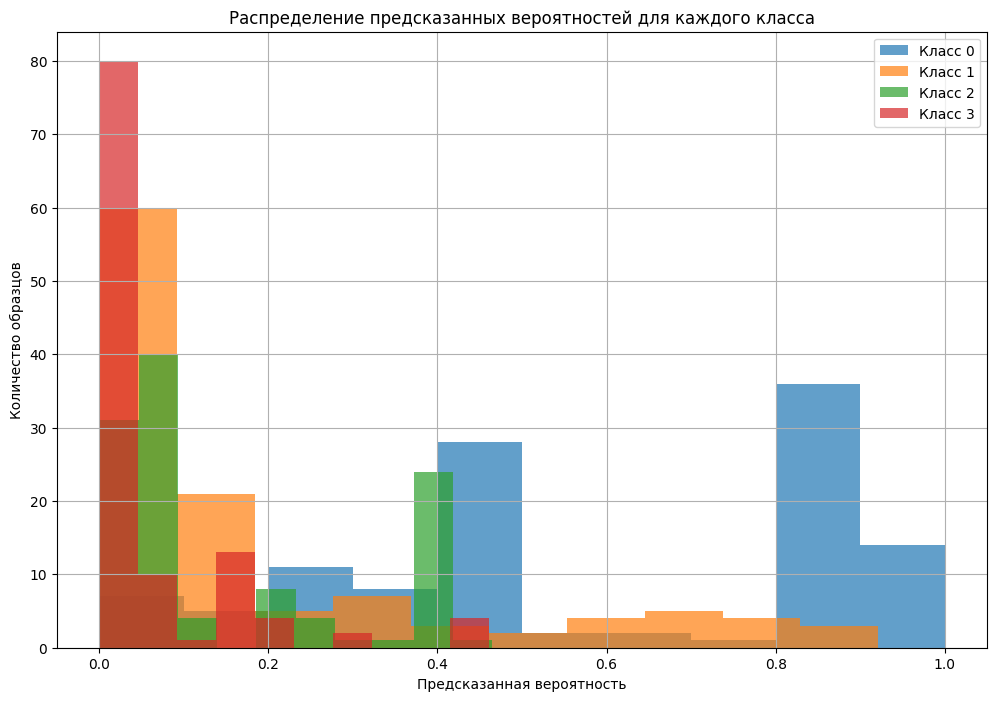

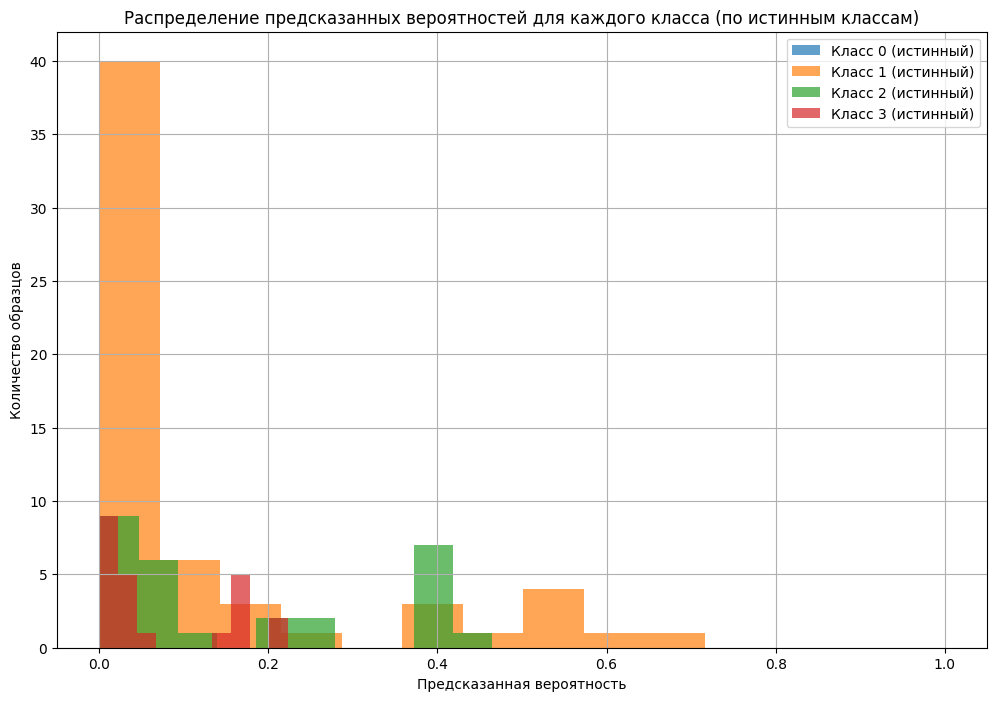

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Пример данных (ЗАМЕНИТЕ на ваши данные!)
# Предсказанные вероятности (каждая строка - образец, каждый столбец - класс)
y_pred_prob = np.array(y_prob)

# Истинные метки классов (для подписи гистограмм, необязательно)
y_true = np.array(y_val.values)


num_classes = y_pred_prob.shape[1] # Количество классов

plt.figure(figsize=(12, 8))

for i in range(num_classes):
    plt.hist(y_pred_prob[:, i], alpha=0.7, label=f'Класс {i}', bins=10)


plt.xlabel('Предсказанная вероятность')
plt.ylabel('Количество образцов')
plt.title('Распределение предсказанных вероятностей для каждого класса')
plt.legend()
plt.grid(True)
plt.show()


# Дополнительный вариант с разделением по истинным классам (если есть y_true)

plt.figure(figsize=(12, 8))
for i in range(num_classes):
    # Фильтруем предсказания по истинным классам
    probs_for_class = y_pred_prob[y_true == i, i]
    plt.hist(probs_for_class, alpha=0.7, label=f'Класс {i} (истинный)', bins=10)

plt.xlabel('Предсказанная вероятность')
plt.ylabel('Количество образцов')
plt.title('Распределение предсказанных вероятностей для каждого класса (по истинным классам)')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
des_tree__pipeline = DecisionTreeRegressor(random_state=42)

In [72]:
des_tree__pipeline.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [85]:
y_val_pred = des_tree__pipeline.predict(X_val)

In [74]:
(y_val_pred == y_val.values).mean()  # accuracy для тренировочной выборки

0.14912280701754385

In [83]:
y_val_pred

array([2.05263158, 2.        , 2.25      , 1.96875   , 1.05714286,
       1.96875   , 1.27777778, 1.96875   , 1.96875   , 1.27777778,
       1.05714286, 1.96875   , 1.05714286, 1.96875   , 2.29166667,
       1.71428571, 2.        , 1.27777778, 2.05263158, 3.        ,
       1.85714286, 1.27777778, 2.        , 1.27777778, 1.27777778,
       1.27777778, 1.33333333, 1.27777778, 2.11111111, 2.29166667,
       2.        , 2.29166667, 1.        , 1.        , 1.27777778,
       2.        , 1.        , 1.27777778, 1.33333333, 2.25      ,
       1.27777778, 1.27777778, 2.5       , 1.27777778, 2.        ,
       1.        , 1.27777778, 2.30769231, 1.6       , 1.27777778,
       1.        , 2.05263158, 1.05714286, 1.27777778, 3.        ,
       2.        , 2.        , 2.        , 1.27777778, 1.27777778,
       2.8       , 1.27777778, 2.05263158, 1.        , 2.30769231,
       2.29166667, 1.27777778, 2.14285714, 2.        , 1.05714286,
       2.        , 1.        , 1.27777778, 2.14285714, 2.8    

In [87]:
num_classes = y_val_pred.shape[1]

IndexError: tuple index out of range

In [86]:
# Построение гистограмм (как в предыдущих примерах, но с y_prob от DecisionTreeClassifier)
num_classes = y_val_pred.shape[1]

plt.figure(figsize=(12, 8))

for i in range(num_classes):
    plt.hist(y_prob[:, i], alpha=0.7, label=f'Класс {i}', bins=10)

plt.xlabel('Предсказанная вероятность')
plt.ylabel('Количество образцов')
plt.title('Распределение предсказанных вероятностей для каждого класса')
plt.legend()
plt.grid(True)
plt.show()

IndexError: tuple index out of range

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Пример данных (ЗАМЕНИТЕ на ваши данные!)
# Предсказанные вероятности (каждая строка - образец, каждый столбец - класс)
y_pred_prob = np.array(y_val_pred)

# Истинные метки классов (для подписи гистограмм, необязательно)
y_true = np.array(y_val.values)


num_classes = 4 # Количество классов

plt.figure(figsize=(12, 8))

for i in range(num_classes):
    plt.hist(y_pred_prob[:, i], alpha=0.7, label=f'Класс {i}', bins=10)


plt.xlabel('Предсказанная вероятность')
plt.ylabel('Количество образцов')
plt.title('Распределение предсказанных вероятностей для каждого класса')
plt.legend()
plt.grid(True)
plt.show()


# Дополнительный вариант с разделением по истинным классам (если есть y_true)

plt.figure(figsize=(12, 8))
for i in range(num_classes):
    # Фильтруем предсказания по истинным классам
    probs_for_class = y_pred_prob[y_true == i, i]
    plt.hist(probs_for_class, alpha=0.7, label=f'Класс {i} (истинный)', bins=10)

plt.xlabel('Предсказанная вероятность')
plt.ylabel('Количество образцов')
plt.title('Распределение предсказанных вероятностей для каждого класса (по истинным классам)')
plt.legend()
plt.grid(True)
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 1200x800 with 0 Axes>

In [60]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Пример данных: категориальный признак с тремя уникальными значениями

# Инициализация OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False возвращает плотный массив

# Обучение и преобразование данных
encouded = encoder.fit_transform(df)

# Вывод закодированных данных
print(encoded_data)



NameError: name 'encoded_data' is not defined

In [ ]:
encouded['Микроорганизм']

: 